In [13]:
import pandas as pd

# Load your dataset (replace with your filename)

df = pd.read_csv(r"C:\Users\WINDOWS 1O\Documents\EmotionDetection\emotion_data.csv.csv")




df.head()
# Melt the DataFrame
df_melted = df.melt(var_name='emotion', value_name='message')

# Drop empty messages
df_melted.dropna(subset=['message'], inplace=True)
df_melted.head()
df_melted.to_csv("student_emotions_cleaned.csv", index=False)



In [14]:
import pandas as pd

df = pd.read_csv(r"C:\Users\WINDOWS 1O\Documents\EmotionDetection\emotion_data.csv.csv")


df_melted = df.melt(var_name='emotion', value_name='message')

df_melted.dropna(subset=['message'], inplace=True)


df_melted = df_melted[['message', 'emotion']]

df_melted.to_csv("student_emotions_cleaned.csv.csv", index=False)

print(df_melted.head())

             message    emotion
0  7/5/2025 23:39:58  Timestamp
1  7/5/2025 23:40:01  Timestamp
2  7/5/2025 23:41:10  Timestamp
3   7/6/2025 0:15:13  Timestamp
4  7/9/2025 20:29:22  Timestamp


In [20]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\WINDOWS 1O\Documents\EmotionDetection\emotion_data.csv.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Print actual column names for debugging
print("Detected Columns:", df.columns.tolist())

# Automatically detect columns that start with a number
emotion_columns = [col for col in df.columns if col[:1].isdigit()]

# Melt to message/emotion format
df_melted = df[emotion_columns].melt(var_name='emotion', value_name='message')

# Drop empty
df_melted.dropna(subset=['message'], inplace=True)

# Clean emotion labels: remove "1. ", fix spelling
df_melted['emotion'] = (
    df_melted['emotion']
    .str.replace(r'^\d+\.\s*', '', regex=True)
    .replace({'Sadnes': 'Sadness'})
)

# Reorder
df_cleaned = df_melted[['message', 'emotion']]
df_cleaned.to_csv("student_emotions_cleaned.csv", index=False)

print(df_cleaned.head())


Detected Columns: ['Timestamp', '1. Joy\n (e.g., Lecturer ended class 30 minutes-early blessing!.)', '2.Sadness  \n (e.g., Missed the scholarship by just 1 mark.)', '3. Anger  \n (e.g.,  Lecturer canceled the class last minute again!)', "4. Fear  \n (e.g., Viva starts in 5 minutes. I'm shaking.)", '5. Neutral  \n (e.g., Had lunch and attended lectures.)']
                                             message  \
0  I finally passed the exam I was so stressed about   
1  Alhamdulillah! I finally got an A for my proje...   
2                          Tomarrow's lecture cancel   
3                                    I am so excited   
4  I’m so happy today! I passed all my subjects i...   

                                             emotion  
0  Joy\n (e.g., Lecturer ended class 30 minutes-e...  
1  Joy\n (e.g., Lecturer ended class 30 minutes-e...  
2  Joy\n (e.g., Lecturer ended class 30 minutes-e...  
3  Joy\n (e.g., Lecturer ended class 30 minutes-e...  
4  Joy\n (e.g., Lecturer ended

In [21]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\WINDOWS 1O\Documents\EmotionDetection\emotion_data.csv.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Print actual column names for debugging
print("Detected Columns:", df.columns.tolist())

# Automatically detect columns that start with a number
emotion_columns = [col for col in df.columns if col[:1].isdigit()]

# Melt to message/emotion format
df_melted = df[emotion_columns].melt(var_name='emotion', value_name='message')

# Drop empty
df_melted.dropna(subset=['message'], inplace=True)

# Clean emotion labels: remove "1. ", fix spelling
df_melted['emotion'] = (
    df_melted['emotion']
    .str.replace(r'^\d+\.\s*', '', regex=True)
    .replace({'Sadnes': 'Sadness'})
    .str.lower()  # convert emotions to lowercase
)

# Convert messages to lowercase
df_melted['message'] = df_melted['message'].str.lower()

# Reorder
df_cleaned = df_melted[['message', 'emotion']]

df_cleaned.to_csv("student_emotions_cleaned_lowercase.csv", index=False)


print(df_cleaned.head())


Detected Columns: ['Timestamp', '1. Joy\n (e.g., Lecturer ended class 30 minutes-early blessing!.)', '2.Sadness  \n (e.g., Missed the scholarship by just 1 mark.)', '3. Anger  \n (e.g.,  Lecturer canceled the class last minute again!)', "4. Fear  \n (e.g., Viva starts in 5 minutes. I'm shaking.)", '5. Neutral  \n (e.g., Had lunch and attended lectures.)']
                                             message  \
0  i finally passed the exam i was so stressed about   
1  alhamdulillah! i finally got an a for my proje...   
2                          tomarrow's lecture cancel   
3                                    i am so excited   
4  i’m so happy today! i passed all my subjects i...   

                                             emotion  
0  joy\n (e.g., lecturer ended class 30 minutes-e...  
1  joy\n (e.g., lecturer ended class 30 minutes-e...  
2  joy\n (e.g., lecturer ended class 30 minutes-e...  
3  joy\n (e.g., lecturer ended class 30 minutes-e...  
4  joy\n (e.g., lecturer ended

In [22]:
import re

# Function to remove emojis and special characters
def clean_text(text):
    # Remove emojis and non-text symbols using regex ranges for emojis/unicode symbols
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002700-\U000027BF"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)  # Remove emojis
    
    # Remove punctuation and symbols (keep only letters, numbers and spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'message' column
df_cleaned['message'] = df_cleaned['message'].apply(clean_text)

# Save cleaned file
df_cleaned.to_csv("student_emotions_cleaned_lowercase_no_symbols.csv", index=False)

print(df_cleaned.head())


                                             message  \
0  i finally passed the exam i was so stressed about   
1  alhamdulillah i finally got an a for my projec...   
2                           tomarrows lecture cancel   
3                                    i am so excited   
4  im so happy today i passed all my subjects in ...   

                                             emotion  
0  joy\n (e.g., lecturer ended class 30 minutes-e...  
1  joy\n (e.g., lecturer ended class 30 minutes-e...  
2  joy\n (e.g., lecturer ended class 30 minutes-e...  
3  joy\n (e.g., lecturer ended class 30 minutes-e...  
4  joy\n (e.g., lecturer ended class 30 minutes-e...  


In [24]:
# Apply the cleaning function
df_cleaned['message'] = df_cleaned['message'].apply(clean_text)

# Drop empty messages after cleaning
df_cleaned = df_cleaned[df_cleaned['message'].str.strip() != '']

# Save the cleaned CSV
df_cleaned.to_csv("student_emotions_cleaned_lowercase_no_symbols.csv", index=False)

print(df_cleaned.head())


                                             message  \
0  i finally passed the exam i was so stressed about   
1  alhamdulillah i finally got an a for my projec...   
2                           tomarrows lecture cancel   
3                                    i am so excited   
4  im so happy today i passed all my subjects in ...   

                                             emotion  
0  joy\n (e.g., lecturer ended class 30 minutes-e...  
1  joy\n (e.g., lecturer ended class 30 minutes-e...  
2  joy\n (e.g., lecturer ended class 30 minutes-e...  
3  joy\n (e.g., lecturer ended class 30 minutes-e...  
4  joy\n (e.g., lecturer ended class 30 minutes-e...  


In [23]:
import nltk
nltk.download('punkt_tab')  # the correct tokenizer name in NLTK v3.8.2+


[nltk_data] Downloading package punkt_tab to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [24]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize("This is a test!")
print(tokens)


['This', 'is', 'a', 'test', '!']


In [1]:
import nltk

try:
    nltk.download('punkt_tab')
except:
    nltk.download('punkt')

# then use word_tokenize as usual


[nltk_data] Downloading package punkt_tab to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
from pathlib import Path
import pandas as pd
import nltk
import os
from nltk.tokenize import word_tokenize

# Download tokenizer
nltk.download('punkt')

# Load CSV
df = pd.read_csv("student_emotions_cleaned_lowercase_no_symbols.csv")

# Tokenize into list
df['tokenized_message'] = df['message'].apply(lambda x: word_tokenize(str(x)))

# Keep only the tokenized message and emotion
df_cleaned = df[['tokenized_message', 'emotion']]

# Dynamically get correct Desktop path
ddesktop_path = Path.home() / "Desktop" / "EmotionDetection" / "Processed"
os.makedirs(desktop_path, exist_ok=True)

# Save
output_file = desktop_path / "student_emotions_tokenized_v2.csv"
df_cleaned.to_csv(output_file, index=False)
print("✅ File saved to:", output_file)


✅ File saved to: C:\Users\WINDOWS 1O\Desktop\EmotionDetection\Processed\student_emotions_tokenized_v2.csv


[nltk_data] Downloading package punkt to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
from pathlib import Path
import pandas as pd
import nltk
import os
import ast
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

# Load the tokenized CSV
desktop_path = Path.home() / "Desktop" / "EmotionDetection" / "Processed"
input_file = desktop_path / "student_emotions_tokenized_v2.csv"
df = pd.read_csv(input_file)

# Convert stringified lists to actual lists using ast.literal_eval
df['tokenized_message'] = df['tokenized_message'].apply(ast.literal_eval)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['filtered_tokens'] = df['tokenized_message'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Keep only necessary columns and rename
df_cleaned = df[['filtered_tokens', 'emotion']]
df_cleaned.rename(columns={'filtered_tokens': 'message'}, inplace=True)

# Save the cleaned file
output_file = desktop_path / "student_emotions_tokenized_no_stopwords.csv"
df_cleaned.to_csv(output_file, index=False)

print("✅ Stopwords removed and file saved to:", output_file)


✅ Stopwords removed and file saved to: C:\Users\WINDOWS 1O\Desktop\EmotionDetection\Processed\student_emotions_tokenized_no_stopwords.csv


[nltk_data] Downloading package stopwords to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\WINDOWS 1O\AppData\Local\Temp\ipykernel_10288\2387088343.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'filtered_tokens': 'message'}, inplace=True)


In [2]:
df_cleaned['message'] = df_cleaned['message'].apply(lambda tokens: ' '.join(tokens))


C:\Users\WINDOWS 1O\AppData\Local\Temp\ipykernel_10288\661077062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['message'] = df_cleaned['message'].apply(lambda tokens: ' '.join(tokens))


In [3]:
df_cleaned = df_cleaned[df_cleaned['message'].apply(len) > 0]


In [4]:
from pathlib import Path
import pandas as pd
import os

# Load your already cleaned (stopword-removed) CSV
input_path = Path.home() / "Desktop" / "EmotionDetection" / "Processed" / "student_emotions_tokenized_no_stopwords.csv"
df_cleaned = pd.read_csv(input_path)

# Convert stringified lists back to Python lists (if needed)
import ast
df_cleaned['message'] = df_cleaned['message'].apply(ast.literal_eval)

# Drop empty rows (where message list is empty)
df_cleaned = df_cleaned[df_cleaned['message'].apply(len) > 0]

# Optionally: rejoin tokens into strings if needed by your model
# df_cleaned['message'] = df_cleaned['message'].apply(lambda tokens: ' '.join(tokens))

# 📁 Create a separate folder for final output
final_output_folder = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned"
os.makedirs(final_output_folder, exist_ok=True)

# Save the final cleaned CSV
final_output_file = final_output_folder / "student_emotions_final_cleaned.csv"
df_cleaned.to_csv(final_output_file, index=False)

print("✅ Final cleaned file saved to:", final_output_file)


✅ Final cleaned file saved to: C:\Users\WINDOWS 1O\Desktop\EmotionDetection\FinalCleaned\student_emotions_final_cleaned.csv


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform emotion labels
df_cleaned['label'] = le.fit_transform(df_cleaned['emotion'])

# Show label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("✅ Label mapping:", label_mapping)


✅ Label mapping: {'anger  \n (e.g.,  lecturer canceled the class last minute again!)': np.int64(0), "fear  \n (e.g., viva starts in 5 minutes. i'm shaking.)": np.int64(1), 'joy\n (e.g., lecturer ended class 30 minutes-early blessing!.)': np.int64(2), 'neutral  \n (e.g., had lunch and attended lectures.)': np.int64(3), 'sadness  \n (e.g., missed the scholarship by just 1 mark.)': np.int64(4)}


In [ ]:
import pandas as pd
from pathlib import Path
import os

# Load the final cleaned CSV
final_output_file = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned" / "student_emotions_final_cleaned.csv"
df_cleaned = pd.read_csv(final_output_file)


In [6]:
from pathlib import Path
import pandas as pd
import os
import ast

# Step 1: Load your final cleaned CSV (no stopwords, no empty rows)
input_path = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned" / "student_emotions_final_cleaned.csv"
df_cleaned = pd.read_csv(input_path)

# Step 2: If message column is stored as a string list, convert it back to a real list
df_cleaned['message'] = df_cleaned['message'].apply(ast.literal_eval)

# OPTIONAL: Join tokens back into full text (this helps for model training later)
df_cleaned['message'] = df_cleaned['message'].apply(lambda tokens: ' '.join(tokens))

# Step 3: Clean the emotion column (remove example text and keep just the emotion word)
df_cleaned['emotion'] = df_cleaned['emotion'].apply(lambda x: x.strip().split()[0].lower())

# Step 4: Apply custom label mapping
emotion_to_label = {
    'joy': 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'neutral': 4
}
df_cleaned['label'] = df_cleaned['emotion'].map(emotion_to_label)

# Step 5: Save the final labeled dataset
final_output_folder = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned"
os.makedirs(final_output_folder, exist_ok=True)

output_file = final_output_folder / "student_emotions_with_labels.csv"
df_cleaned.to_csv(output_file, index=False)

print("✅ Final labeled file saved to:", output_file)


✅ Final labeled file saved to: C:\Users\WINDOWS 1O\Desktop\EmotionDetection\FinalCleaned\student_emotions_with_labels.csv


In [7]:
from pathlib import Path
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load your final labeled CSV
input_file = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned" / "student_emotions_with_labels.csv"
df = pd.read_csv(input_file)

# Step 2: Extract message and label columns
texts = df['message']         # This is your input (X)
labels = df['label']          # This is your target (y)

# Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)  # X is now a matrix of TF-IDF features
y = labels                           # y is already numeric (your emotion labels)

# Step 4: Show the shape of the result
print("✅ Vectorization complete.")
print("Feature matrix shape (X):", X.shape)
print("Number of labels (y):", len(y))


✅ Vectorization complete.
Feature matrix shape (X): (757, 1114)
Number of labels (y): 757


In [8]:
import pandas as pd
import numpy as np
from pathlib import Path

# Convert sparse matrix X to a dense array
X_dense = X.toarray()

# Get feature names (TF-IDF words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for X
df_X = pd.DataFrame(X_dense, columns=feature_names)

# Add the labels to the DataFrame
df_X['label'] = y.values

# Define the output path
output_path = Path.home() / "Desktop" / "EmotionDetection" / "Vectorized"
output_path.mkdir(parents=True, exist_ok=True)

# Save to CSV
output_file = output_path / "student_emotions_vectorized.csv"
df_X.to_csv(output_file, index=False)

print("✅ Vectorized data with labels saved to:", output_file)


✅ Vectorized data with labels saved to: C:\Users\WINDOWS 1O\Desktop\EmotionDetection\Vectorized\student_emotions_vectorized.csv


Matplotlib is building the font cache; this may take a moment.


Accuracy: 0.5986842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.52      0.58        31
           1       0.56      0.63      0.59        30
           2       0.70      0.49      0.58        39
           3       0.54      0.58      0.56        26
           4       0.56      0.85      0.68        26

    accuracy                           0.60       152
   macro avg       0.61      0.61      0.60       152
weighted avg       0.61      0.60      0.59       152



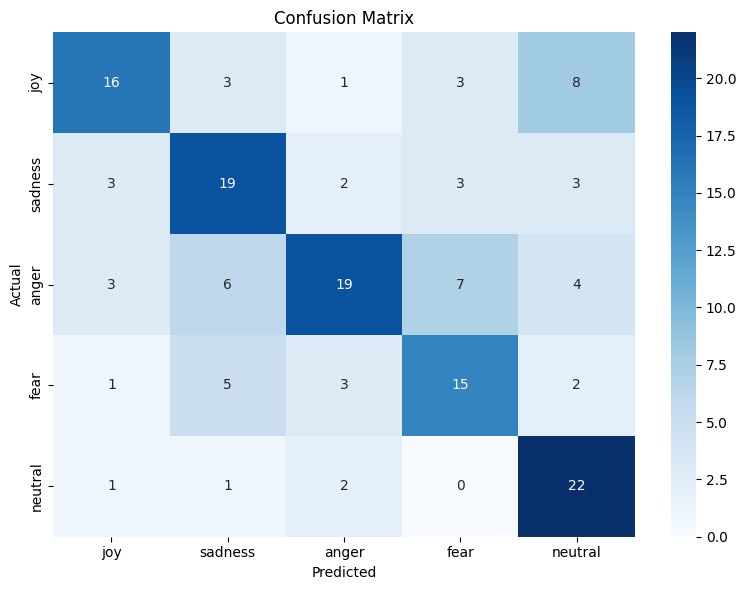

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = clf.predict(X_test)

# Step 4: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Optional: define label names if available
label_names = ['joy', 'sadness', 'anger', 'fear', 'neutral']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.5987
Naive Bayes Accuracy: 0.6053
SVM Accuracy: 0.5987
Random Forest Accuracy: 0.5592


In [12]:
import joblib

# Save model and vectorizer
joblib.dump(clf, "emotion_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download once
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Reverse mapping for label → emotion name
label_to_emotion = {
    0: "joy",
    1: "sadness",
    2: "anger",
    3: "fear",
    4: "neutral"
}

def predict_emotion(text):
    text_cleaned = ' '.join([word for word in word_tokenize(text.lower()) if word not in stop_words])
    text_vector = vectorizer.transform([text_cleaned])
    pred_label = clf.predict(text_vector)[0]
    return label_to_emotion[pred_label]

# ✅ Test
print(predict_emotion("I'm really nervous about tomorrow's exam."))


[nltk_data] Downloading package punkt to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...


fear


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\WINDOWS
[nltk_data]     1O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Load final dataset
file_path = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned" / "student_emotions_with_labels.csv"
df = pd.read_csv(file_path)


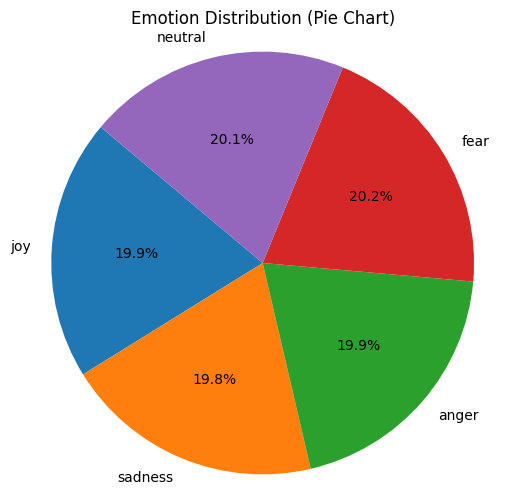

In [17]:
# Count each emotion
label_counts = df['label'].value_counts().sort_index()
labels = ['joy', 'sadness', 'anger', 'fear', 'neutral']

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Emotion Distribution (Pie Chart)")
plt.axis('equal')
plt.show()


C:\Users\WINDOWS 1O\AppData\Local\Temp\ipykernel_10288\1783147096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=label_counts.values, palette='pastel')


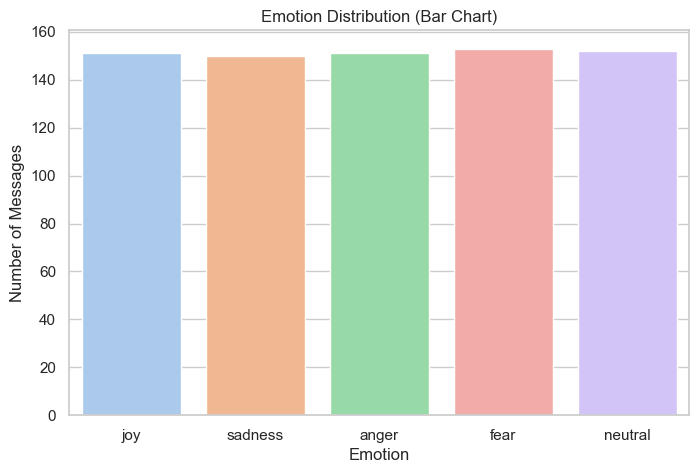

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=label_counts.values, palette='pastel')
plt.title("Emotion Distribution (Bar Chart)")
plt.xlabel("Emotion")
plt.ylabel("Number of Messages")
plt.show()


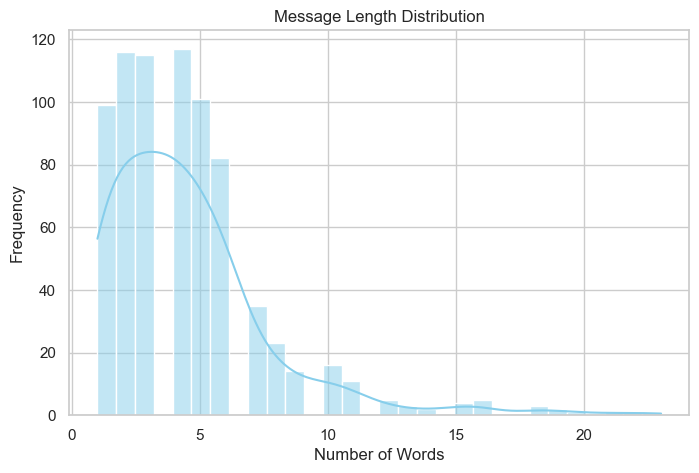

In [19]:
df['message_length'] = df['message'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['message_length'], bins=30, kde=True, color='skyblue')
plt.title("Message Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [20]:
import os
from pathlib import Path

processed_path = Path.home() / "Desktop" / "EmotionDetection" / "Processed"
final_path = Path.home() / "Desktop" / "EmotionDetection" / "FinalCleaned"

print("📁 Processed Folder Files:", os.listdir(processed_path))
print("📁 FinalCleaned Folder Files:", os.listdir(final_path))


📁 Processed Folder Files: ['student_emotions_tokenized.csv', 'student_emotions_tokenized_no_stopwords.csv', 'student_emotions_tokenized_v2.csv']
📁 FinalCleaned Folder Files: ['student_emotions_final_cleaned.csv', 'student_emotions_with_labels.csv']


In [21]:
import pandas as pd

# Load the final cleaned and labeled dataset
df = pd.read_csv("student_emotions_with_labels.csv")  # Update path if needed


FileNotFoundError: [Errno 2] No such file or directory: 'student_emotions_with_labels.csv'

In [22]:
# Total responses
total = len(df)

# Count empty messages (if any)
invalid = df['message'].apply(lambda x: len(str(x).strip()) == 0).sum()

# Valid responses
valid = total - invalid

print(f"Total Responses: {total}")
print(f"Valid Responses: {valid}")
print(f"Invalid Responses: {invalid}")


Total Responses: 757
Valid Responses: 757
Invalid Responses: 0


In [23]:
for col in df.columns:
    print(f"{col:15} ➜ {df[col].dtype}")


message         ➜ object
emotion         ➜ object
label           ➜ int64
message_length  ➜ int64


In [25]:
import matplotlib.pyplot as plt

# Count missing values
missing = df.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0]

if not missing.empty:
    missing.plot(kind='bar', color='tomato')
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.xlabel("Column Name")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values in any column.")


✅ No missing values in any column.


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
